<a href="https://colab.research.google.com/github/rajagopalmotivate/DeepLearningforSocietal/blob/main/Vision_Transformers_apply.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow_addons

     |████████████████████████████████| 1.1 MB 5.6 MB/s 


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
import glob, warnings
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

warnings.filterwarnings('ignore')
print('TensorFlow Version ' + tf.__version__)

TensorFlow Version 2.7.0


In [3]:
!wget https://b2share.eudat.eu/api/files/e3126ced-cb0b-4fde-a081-1aad550cae86/MEMS_devices_and_electrodes.tar -O /tmp/dir1.tar

--2021-12-12 15:27:41--  https://b2share.eudat.eu/api/files/e3126ced-cb0b-4fde-a081-1aad550cae86/MEMS_devices_and_electrodes.tar
Resolving b2share.eudat.eu (b2share.eudat.eu)... 86.50.166.74
Connecting to b2share.eudat.eu (b2share.eudat.eu)|86.50.166.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3305451520 (3.1G) [application/octet-stream]
Saving to: ‘/tmp/dir1.tar’

/tmp/dir1.tar       100%[===================>]   3.08G  21.9MB/s    in 2m 29s  

2021-12-12 15:30:10 (21.2 MB/s) - ‘/tmp/dir1.tar’ saved [3305451520/3305451520]



In [4]:
!wget https://b2share.eudat.eu/api/files/e3126ced-cb0b-4fde-a081-1aad550cae86/Particles.tar -O /tmp/dir2.tar


--2021-12-12 15:30:10--  https://b2share.eudat.eu/api/files/e3126ced-cb0b-4fde-a081-1aad550cae86/Particles.tar
Resolving b2share.eudat.eu (b2share.eudat.eu)... 86.50.166.74
Connecting to b2share.eudat.eu (b2share.eudat.eu)|86.50.166.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2519879680 (2.3G) [application/octet-stream]
Saving to: ‘/tmp/dir2.tar’

/tmp/dir2.tar       100%[===================>]   2.35G  21.6MB/s    in 1m 54s  

2021-12-12 15:32:06 (21.0 MB/s) - ‘/tmp/dir2.tar’ saved [2519879680/2519879680]



In [5]:
!wget https://b2share.eudat.eu/api/files/e3126ced-cb0b-4fde-a081-1aad550cae86/Nanowires.tar -O /tmp/dir3.tar

--2021-12-12 15:32:06--  https://b2share.eudat.eu/api/files/e3126ced-cb0b-4fde-a081-1aad550cae86/Nanowires.tar
Resolving b2share.eudat.eu (b2share.eudat.eu)... 86.50.166.74
Connecting to b2share.eudat.eu (b2share.eudat.eu)|86.50.166.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2203371520 (2.1G) [application/octet-stream]
Saving to: ‘/tmp/dir3.tar’

/tmp/dir3.tar       100%[===================>]   2.05G  21.6MB/s    in 99s     

2021-12-12 15:33:46 (21.3 MB/s) - ‘/tmp/dir3.tar’ saved [2203371520/2203371520]



In [6]:
!wget https://b2share.eudat.eu/api/files/e3126ced-cb0b-4fde-a081-1aad550cae86/Patterned_surface.tar  -O /tmp/dir4.tar

--2021-12-12 15:33:46--  https://b2share.eudat.eu/api/files/e3126ced-cb0b-4fde-a081-1aad550cae86/Patterned_surface.tar
Resolving b2share.eudat.eu (b2share.eudat.eu)... 86.50.166.74
Connecting to b2share.eudat.eu (b2share.eudat.eu)|86.50.166.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874941440 (2.7G) [application/octet-stream]
Saving to: ‘/tmp/dir4.tar’

/tmp/dir4.tar       100%[===================>]   2.68G  21.7MB/s    in 2m 9s   

2021-12-12 15:35:56 (21.3 MB/s) - ‘/tmp/dir4.tar’ saved [2874941440/2874941440]



In [7]:
!rm -r mynewfiles
!mkdir mynewfiles

rm: cannot remove 'mynewfiles': No such file or directory


In [8]:
!tar xf  /tmp/dir1.tar -C mynewfiles

In [9]:
!tar xf  /tmp/dir2.tar -C mynewfiles

In [10]:
def data_augment(image):
    p_spatial = tf.random.uniform([], 0, 1.0, dtype = tf.float32)
    p_rotate = tf.random.uniform([], 0, 1.0, dtype = tf.float32)
    p_pixel_1 = tf.random.uniform([], 0, 1.0, dtype = tf.float32)
    p_pixel_2 = tf.random.uniform([], 0, 1.0, dtype = tf.float32)
    p_pixel_3 = tf.random.uniform([], 0, 1.0, dtype = tf.float32)
    
    # Flips
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    
    if p_spatial > .75:
        image = tf.image.transpose(image)
        
    # Rotates
    if p_rotate > .75:
        image = tf.image.rot90(image, k = 3) # rotate 270º
    elif p_rotate > .5:
        image = tf.image.rot90(image, k = 2) # rotate 180º
    elif p_rotate > .25:
        image = tf.image.rot90(image, k = 1) # rotate 90º
        
    # Pixel-level transforms
    if p_pixel_1 >= .4:
        image = tf.image.random_saturation(image, lower = .7, upper = 1.3)
    if p_pixel_2 >= .4:
        image = tf.image.random_contrast(image, lower = .8, upper = 1.2)
    if p_pixel_3 >= .4:
        image = tf.image.random_brightness(image, max_delta = .1)
        
    return image

In [11]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                                          samplewise_center = True,
                                                          samplewise_std_normalization = True,
                                                          validation_split = 0.2,
                                                          preprocessing_function = data_augment)

In [12]:
TRAINING_DIR = "mynewfiles/"
SIZE = 224


train_generator = datagen.flow_from_directory(
    TRAINING_DIR, 
    subset='training',
    target_size=(SIZE,SIZE),
         shuffle=True,     batch_size=16,
	  class_mode='categorical'
)

Found 6791 images belonging to 2 classes.


In [13]:
val_generator = datagen.flow_from_directory(
    TRAINING_DIR, 
    subset='validation',
    target_size=(SIZE,SIZE),
         shuffle=True,     batch_size=64,
	  class_mode='categorical'
)

Found 1697 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

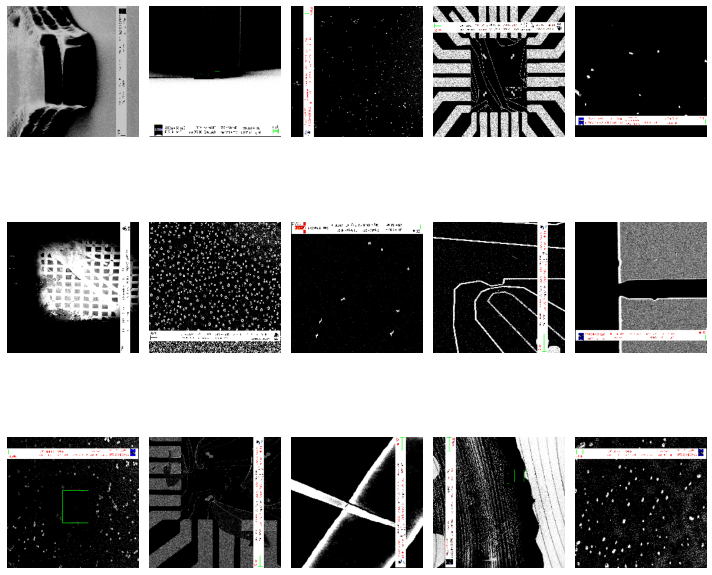

In [14]:
images = [train_generator[0][0][i] for i in range(16)]
fig, axes = plt.subplots(3, 5, figsize = (10, 10))

axes = axes.flatten()

for img, ax in zip(images, axes):
    ax.imshow(img.reshape(SIZE, SIZE, 3))
    ax.axis('off')

plt.tight_layout()
plt.show()

In [15]:
!pip install --quiet vit-keras

from vit_keras import vit

In [16]:
IMAGE_SIZE = SIZE

In [17]:
vit_model = vit.vit_b32 (
        image_size = (SIZE, SIZE), 
        activation = 'softmax',
        pretrained = True,
        include_top = True,
        pretrained_top = False,
        classes = 2)

vit_model.trainable = True

353263616/353253686 [==============================] - 5s 0us/step


In [18]:
def trainAModel(model, epochs):
  learning_rate = 1e-4

  optimizer = tfa.optimizers.RectifiedAdam(learning_rate = learning_rate)

  model.compile(optimizer = optimizer, 
                loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing = 0.2), 
                metrics = ['accuracy'])

  STEP_SIZE_TRAIN = train_generator.n // train_generator.batch_size
  STEP_SIZE_VALID = val_generator.n // val_generator.batch_size

  reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_accuracy',
                                                  factor = 0.2,
                                                  patience = 2,
                                                  verbose = 1,
                                                  min_delta = 1e-4,
                                                  min_lr = 1e-6,
                                                  mode = 'max')

  earlystopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy',
                                                  min_delta = 1e-4,
                                                  patience = 5,
                                                  mode = 'max',
                                                  restore_best_weights = True,
                                                  verbose = 1)

  checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath = './model.hdf5',
                                                    monitor = 'val_accuracy', 
                                                    verbose = 1, 
                                                    save_best_only = True,
                                                    save_weights_only = True,
                                                    mode = 'max')
  
  tbCallBack = tf.keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)


  callbacks = [earlystopping, reduce_lr, checkpointer, tbCallBack]

  history = model.fit(x = train_generator,
            steps_per_epoch = STEP_SIZE_TRAIN,
            validation_data = val_generator ,
            validation_steps = STEP_SIZE_VALID,
            epochs = epochs,
            callbacks = callbacks)

  return history , model

In [19]:
img_inputs = tf.keras.Input(shape=(SIZE, SIZE, 3))

layer1 = vit_model (img_inputs)
layer2 = tf.keras.layers.Flatten()  (layer1)
layer3 = tf.keras.layers.BatchNormalization()   (layer2)

finallayer6 = tf.keras.layers.Dense(6, activation = tfa.activations.gelu)  (layer3)
finallayer7 = tf.keras.layers.BatchNormalization()   (finallayer6)


finallayer8 = tf.keras.layers.Dense(2, 'softmax')  (finallayer7)


modelVIT1 = tf.keras.Model(inputs=img_inputs, outputs=finallayer8, name="Karunya")



In [ ]:
modelVIT1.summary()

In [ ]:
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(vit_model, to_file=dot_img_file, show_shapes=True)

In [ ]:
for i, layer in enumerate ( vit_model.layers):
  print(i,  layer.trainable  , '  ',  layer.name, '  ')

In [23]:
historyvit_model , vit_modelTRAINED = trainAModel(vit_model , 2 )

Epoch 1/2
424/424 [==============================] - ETA: 0s - loss: 0.4142 - accuracy: 0.9460
Epoch 00001: val_accuracy improved from -inf to 0.98678, saving model to ./model.hdf5
424/424 [==============================] - 522s 1s/step - loss: 0.4142 - accuracy: 0.9460 - val_loss: 0.3662 - val_accuracy: 0.9868 - lr: 1.0000e-04
Epoch 2/2
424/424 [==============================] - ETA: 0s - loss: 0.3544 - accuracy: 0.9897
Epoch 00002: val_accuracy improved from 0.98678 to 0.99099, saving model to ./model.hdf5
424/424 [==============================] - 481s 1s/step - loss: 0.3544 - accuracy: 0.9897 - val_loss: 0.3435 - val_accuracy: 0.9910 - lr: 1.0000e-04


In [24]:
vit_modelTRAINED

In [25]:
historyvit_model.history['accuracy']

[0.9459778666496277, 0.9896678924560547]

In [26]:
historyvit_model.history['val_accuracy']

[0.9867788553237915, 0.9909855723381042]

# Excercise 

Try switching to modelVIT1.  What is the accuracy?

In [ ]:
historymetricforsecondmodel , metricforsecondmodel = trainAModel(modelVIT1 , 2 )


# End of Lab

In [ ]:
 end of the lab

NameError: ignored

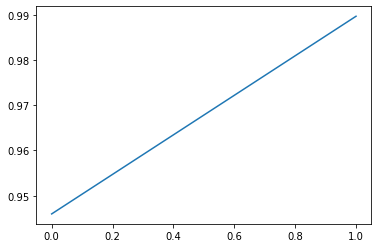

In [27]:
 
plt.plot(historyvit_model.history['accuracy'])
plt.plot(historyCNN.history['accuracy'])
plt.title('model Training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Vision Transformer', 'ResNet'])
plt.show()

In [ ]:

plt.plot(historyvit_model.history['val_accuracy'])
plt.plot(historyCNN.history['val_accuracy'])
plt.title('model Validation  accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Vision Transformer', 'ResNet'])
plt.show()

In [ ]:
plt.plot(historyvit_model.history['val_loss'])
plt.plot(historyCNN.history['val_loss'])
plt.title('model Validation  Loss')
plt.ylabel('Validation Loss')
plt.xlabel('epoch')
plt.legend(['Vision Transformer', 'ResNet'])
plt.show()

In [ ]:
plt.plot(historyvit_model.history['loss'])
plt.plot(historyCNN.history['loss'])
plt.title('model Training  Loss')
plt.ylabel('Validation Loss')
plt.xlabel('epoch')
plt.legend(['Vision Transformer', 'ResNet'])
plt.show()

In [ ]:
history = historyvit_model

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'] )
plt.show()

In [ ]:
vit_model.summary()

In [ ]:
historymodelVIT1 , modelVIT1TRAINED = trainAModel(vit_model , 20 )

In [ ]:
modelVIT1TRAINED

In [ ]:
# summarize history for accuracy


In [ ]:
from vit_keras import vit, utils, visualize

# Get an image and compute the attention map
url = 'https://upload.wikimedia.org/wikipedia/commons/b/bc/Free%21_%283987584939%29.jpg'
image_size = 384

image = utils.read(url, image_size)

type(image)

image.shape

In [ ]:
sffsfsfs

In [ ]:
img_inputs = tf.keras.Input(shape=(SIZE, SIZE, 3))

layer1 = vit_model (img_inputs)
layer2 = tf.keras.layers.Flatten()  (layer1)
layer3 = tf.keras.layers.BatchNormalization()   (layer2)
layer4 = tf.keras.layers.Dense(64, activation = tfa.activations.gelu)  (layer3)
layer5 = tf.keras.layers.BatchNormalization()   (layer4)



In [ ]:
img_inputs = tf.keras.Input(shape=(SIZE, SIZE, 3))

layer1 = vit_model (img_inputs)
layer2 = tf.keras.layers.Flatten()  (layer1)
layer3 = tf.keras.layers.BatchNormalization()   (layer2)
layer4 = tf.keras.layers.Dense(64, activation = tfa.activations.gelu)  (layer3)
layer5 = tf.keras.layers.BatchNormalization()   (layer4)
layer6 = tf.keras.layers.Dropout(0.1)   (layer5)



finallayer4 = tf.keras.layers.Dense(16, activation = tfa.activations.gelu)  (layer6)
finallayer5 = tf.keras.layers.BatchNormalization()   (finallayer4)

finallayer6 = tf.keras.layers.Dense(11, activation = tfa.activations.gelu)  (finallayer5)
finallayer7 = tf.keras.layers.BatchNormalization()   (finallayer6)

finallayer8 = tf.keras.layers.Dense(2, 'softmax')  (finallayer7)


modelVIT1 = tf.keras.Model(inputs=img_inputs, outputs=finallayer8, name="hi")



In [ ]:
resnetmodel = tf.keras.applications.InceptionResNetV2 (include_top=False)
resnetmodel.trainable = False

In [ ]:
resnetmodel = tf.keras.applications.InceptionV3 (include_top=False )
resnetmodel.trainable = True

In [ ]:
for i, layer in enumerate ( resnetmodel.layers):
  if i > 700:
    layer.trainable = True 

In [ ]:
for i, layer in enumerate ( resnetmodel.layers):
  print(i,  layer.trainable  , '  ',  layer.name, '  ')

In [ ]:
img_inputs = tf.keras.Input(shape=(SIZE, SIZE, 3))

layer1 = resnetmodel  (img_inputs, training=False)
layer2 = tf.keras.layers.Flatten()  (layer1)
layer3 = tf.keras.layers.BatchNormalization()   (layer2)
layer4 = tf.keras.layers.Dense(64, activation = tfa.activations.gelu)  (layer3)
layer5 = tf.keras.layers.BatchNormalization()   (layer4)
layer6 = tf.keras.layers.Dropout(0.1)  (layer5)

finallayer4 = tf.keras.layers.Dense(16, activation = tfa.activations.gelu)  (layer6)
finallayer5 = tf.keras.layers.BatchNormalization()   (finallayer4)

finallayer6 = tf.keras.layers.Dense(11, activation = tfa.activations.gelu)  (finallayer5)
finallayer7 = tf.keras.layers.BatchNormalization()   (finallayer6)

finallayer8 = tf.keras.layers.Dense(2, 'softmax')  (finallayer7)


modelCNN1 = tf.keras.Model(inputs=img_inputs, outputs=finallayer8, name="hii")

In [ ]:
historyCNN, trainedCNNmodel = trainAModel(modelCNN1, 20)

In [ ]:
historyCNN, trainedCNNmodel = trainAModel(modelCNN1, 20)

In [ ]:
for i, layer in enumerate ( modelCNN1.layers):
  print(i,  layer.trainable  , '  ',  layer.name, '  ')

In [ ]:
modelCNN1.summary()

In [ ]:
# summarize history for accuracy
history = historyCNN

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
history.history['val_accuracy']

In [ ]:
trainedCNNmodel.save('trainedCNNmodel.h5')

In [ ]:
# summarize history for accuracy
history = historyCNN

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
history.history['accuracy']

In [ ]:
history.history['val_accuracy']

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'] )
plt.show()

In [ ]:
val_generatorCONF = datagen.flow_from_directory(
    TRAINING_DIR, 
    subset='validation',
    target_size=(SIZE,SIZE),
         shuffle=False,     batch_size=64,
	  class_mode='categorical'
)

In [ ]:
feature = test1.predict(val_generatorCONF)

In [ ]:
feature.shape

In [ ]:

valid_gen = val_generatorCONF
predicted_classes = np.argmax(trainedCNNmodel.predict(valid_gen, steps = valid_gen.n // valid_gen.batch_size + 1), axis = 1)
true_classes = valid_gen.classes
class_labels = list(valid_gen.class_indices.keys())  

confusionmatrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize = (4, 4))
sns.heatmap(confusionmatrix, cmap = 'Blues', annot = True, cbar = True)

print(classification_report(true_classes, predicted_classes))

In [ ]:
confusionmatrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize = (4, 4))
sns.heatmap(confusionmatrix, cmap = 'Blues', annot = True, cbar = True,  fmt='g')

print(classification_report(true_classes, predicted_classes))

In [ ]:
confusionmatrix

In [ ]:

valid_gen = val_generatorCONF
predicted_classes = np.argmax( vit_modelTRAINED.predict(valid_gen, steps = valid_gen.n // valid_gen.batch_size + 1), axis = 1)
true_classes = valid_gen.classes
class_labels = list(valid_gen.class_indices.keys())  

confusionmatrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize = (4, 4))
sns.heatmap(confusionmatrix, cmap = 'Blues', annot = True, cbar = True)

print(classification_report(true_classes, predicted_classes))

In [ ]:
confusionmatrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize = (4, 4))
sns.heatmap(confusionmatrix, cmap = 'Blues', annot = True, cbar = True,  fmt='g')

print(classification_report(true_classes, predicted_classes))

In [ ]:
confusionmatrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize = (3, 3))
sns.set(font_scale=1.4)
sns.heatmap(confusionmatrix, cmap = 'Blues', annot = True, cbar = True,  fmt='g')

print(classification_report(true_classes, predicted_classes))

In [ ]:
confusionmatrix

In [ ]:
confusionmatrix

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir  './Graph'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
vit_modelTRAINED.summary()

In [ ]:
for i in vit_modelTRAINED.layers:
  print (i) 

In [ ]:
vit_modelTRAINED.layers[19]

In [ ]:
layer_outputs = [layer.output for layer in vit_modelTRAINED.layers]
 

test1  = tf.keras.Model ( inputs= vit_modelTRAINED.input, outputs=layer_outputs[16])
test1.summary()

In [ ]:
feature = test1.predict(val_generatorCONF)

In [ ]:
feature[0].shape

In [ ]:
!ls /content/drive/MyDrive 

In [ ]:
model_save_name = 'ViTmodel1.pt'
path = F"/content/drive/MyDrive/RajaViTModel" 
torch.save(model.state_dict(), path)

In [ ]:
vit_modelTRAINED.save("/content/drive/MyDrive/vit_modelTRAINED.h5")

In [ ]:

valid_gen = val_generator
predicted_classes = np.argmax(trainedCNNmodel.predict(valid_gen, steps = valid_gen.n // valid_gen.batch_size + 1), axis = 1)
true_classes = valid_gen.classes
class_labels = list(valid_gen.class_indices.keys())  

confusionmatrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize = (16, 16))
sns.heatmap(confusionmatrix, cmap = 'Blues', annot = True, cbar = True)

print(classification_report(true_classes, predicted_classes))

In [ ]:
trainedCNNmodel.predict(valid_gen)

In [ ]:
predictions = trainedCNNmodel.predict(valid_gen)

In [ ]:
predictions

In [ ]:
test1 = np.argmax(predictions, axis = 1 )

In [ ]:
test1

In [ ]:
valid_gen.classes

In [ ]:
true_classes = valid_gen.classes

In [ ]:
true_classes

In [ ]:
class_labels

In [ ]:
confusionmatrix

In [ ]:
confusionmatrix = confusion_matrix(true_classes, test1)

In [ ]:
confusionmatrix

In [ ]:
waitheree

In [ ]:
vit_model2 = vit.vit_b16(
        image_size = IMAGE_SIZE,
        
        activation = 'softmax',
        pretrained = True,
        include_top = False,
        pretrained_top = False,
        classes = 2)

In [ ]:
path2layer00 = tf.keras.layers.Conv2D(filters=6, kernel_size=3, strides=1, padding='same', activation='relu')    (img_inputs)      
path2layer01 = tf.keras.layers.Conv2D(filters=6, kernel_size=3, strides=1, padding='same', activation='relu')    (path2layer00)      
path2layer02 = tf.keras.layers.Conv2D(filters=3, kernel_size=3, strides=1, padding='same', activation='relu')    (path2layer01)      

vit_model.trainable = False   
path2layer1 = vit_model (path2layer02)
path2layer2 = tf.keras.layers.Flatten()  (path2layer1)
path2layer3 = tf.keras.layers.BatchNormalization()   (path2layer2)
path2layer4 = tf.keras.layers.Dense(64, activation = tfa.activations.gelu)  (path2layer3)
path2layer5 = tf.keras.layers.BatchNormalization()   (path2layer4)


#model = tf.keras.Model(inputs=img_inputs, outputs=path2layer6, name="standardmodel2")



In [ ]:
concantedlayer = tf.keras.layers.Concatenate() ([layer5, path2layer5]) 

In [ ]:
finallayer4 = tf.keras.layers.Dense(64, activation = tfa.activations.gelu)  (concantedlayer)
finallayer5 = tf.keras.layers.BatchNormalization()   (finallayer4)

finallayer6 = tf.keras.layers.Dense(11, activation = tfa.activations.gelu)  (finallayer5)
finallayer7 = tf.keras.layers.BatchNormalization()   (finallayer6)

finallayer8 = tf.keras.layers.Dense(2, 'softmax')  (finallayer7)


In [ ]:
model1 = tf.keras.Model(inputs=img_inputs, outputs=finallayer8, name="thankyou")


In [ ]:
model1.summary()

In [ ]:
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model1, to_file=dot_img_file, show_shapes=True)

In [ ]:
 historytest , testmodel = trainAModel(model1 , 1 )

In [ ]:
model.summary()

In [ ]:
modelVit1 = tf.keras.Sequential([
        vit_model,
        tf.keras.layers.Flatten(),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(11, activation = tfa.activations.gelu),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(2, 'softmax')
    ],
    name = 'vision_transformer')

modelVit1.summary()

In [ ]:
 history , modelVit1Trained = trainAModel(modelVit1 , 1 )

In [ ]:
 
 modelVit1history = history 

In [ ]:
modelVit1Trained.save('modelVit1Trained.h5' )

In [ ]:
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(modelVit1Trained, to_file=dot_img_file, show_shapes=True)

In [ ]:
temp1 = vit.vit_b32 (
        image_size = IMAGE_SIZE,
        activation = 'softmax',
        pretrained = True,
        include_top = False,
        pretrained_top = False,
        classes = 2)

In [ ]:
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(temp1, to_file=dot_img_file, show_shapes=True)

In [ ]:
vit_model.summary()

In [ ]:
modelVit2  = tf.keras.Sequential([
        tf.keras.layers.Conv2D(filters=3, kernel_size=3, strides=1, padding='same', activation='relu') ,                    
        vit_model,
        tf.keras.layers.Flatten(),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(11, activation = tfa.activations.gelu),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(2, 'softmax')
    ],
    name = 'vision_transformer')


In [ ]:
modelVit2history , modelVit2Trained = trainAModel(modelVit2 , 1 )

In [ ]:
modelVit3  = tf.keras.Sequential([
        tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=1, padding='same', activation='relu') ,                    
        tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=1, padding='same', activation='relu') ,                    
        tf.keras.layers.Conv2D(filters=3, kernel_size=3, strides=1, padding='same', activation='relu') ,                    
        vit_model,
        tf.keras.layers.Flatten(),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(11, activation = tfa.activations.gelu),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(2, 'softmax')
    ],
    name = 'vision_transformer')

In [ ]:
modelVit3history , modelVit3Trained = trainAModel(modelVit3 , 1 )

In [ ]:
modelVit3Trained.save('modelVit3Trained.h5')

In [ ]:
modelVit3Trained

In [ ]:
layer_outputs = [layer.output for layer in modelVit3Trained.layers]
activation_model1 = models.Model(modelVit3Trained.input, outputs=layer_outputs[5])
activation_model1.summary()

In [ ]:
layer_outputs = [layer.output for layer in modelVit1Trained.layers]
activation_model2 = models.Model(modelVit1Trained.input, outputs=layer_outputs[2])
activation_model2.summary()

In [ ]:
commoninput = modelVit1Trained.input

layer_outputs1 = [layer.output for layer in modelVit1Trained.layers]
outputs1=layer_outputs1[2]

layer_outputs2 = [layer.output for layer in modelVit3Trained.layers]
outputs2=layer_outputs2[5]


concateoutputs1and2 = tf.keras.layers.Concatenate()([outputs1, outputs2]) 


last1 =       tf.keras.layers.Dense(2, 'softmax') (concateoutputs1and2)
 

newmodel = tf.keras.Model(inputs=[modelVit1Trained.input, modelVit3Trained.input], outputs=last1)

In [ ]:
newmodel.summary()

In [ ]:
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(newmodel, to_file=dot_img_file, show_shapes=True)

In [ ]:
newmodel()

In [ ]:
commoninput = tf.keras.Input(shape=(None, 224, 224, 3))
finalnewmodel = newmodel()   ( commoninput )

In [ ]:
classifer  = tf.keras.Sequential([
        newmodel,
        tf.keras.layers.Dense(2, 'softmax')
    ],
    name = 'dsfsfs')

In [ ]:
visible = Input(shape=(2,))
hidden = Dense(2)(visible)
model = Model(inputs=visible, outputs=hidden)

In [ ]:
temp1 = vit.vit_b32 (
        image_size = IMAGE_SIZE,
        activation = 'softmax',
        pretrained = True,
        include_top = False,
        pretrained_top = False,
        classes = 2)

In [ ]:
from keras import models

layer_outputs = [layer.output for layer in temp1.layers]
# Creates a model that will return these outputs, given the model input:
#smallvit_model = models.Model(inputs=temp1.input, outputs=layer_outputs)
#smallvit_model = models.Model(temp1.input, outputs=layer_outputs[1])

smallvit_model = models.Model(inputs = layer_outputs[1], outputs=layer_outputs)



In [ ]:
smallvit_model.summary()

In [ ]:
modelVit3history , modelVit3Trained = trainAModel(modelVit3 , 1 )

In [ ]:
modelVit1Trained

In [ ]:
valid_gen = val_generator
predicted_classes = np.argmax(model.predict(valid_gen, steps = valid_gen.n // valid_gen.batch_size + 1), axis = 1)
true_classes = valid_gen.classes
class_labels = list(valid_gen.class_indices.keys())  


In [ ]:
predicted_classes

In [ ]:
model.predict(valid_gen, batch_size=1, steps=1)

In [ ]:
model.summary()

In [ ]:
layer_outputs = [layer.output for layer in model.layers]
layer_outputs[0]

In [ ]:
!wget https://raw.githubusercontent.com/nirmalaIndia/nano/master/ps1.jpg


In [ ]:
!ls mynewfiles  

In [ ]:

import os

ListofmyFolders = []


for i in range(2):
  ListofmyFolders.append( os.path.join('mynewfiles/dir' + str(i+1))  )
  print('total training images:', len(os.listdir(ListofmyFolders[i])))

In [ ]:

ListofmyFolders = ['mynewfiles/MEMS_devices_and_electrodes' , 'mynewfiles/Particles']

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing import image


img_path = 'ps1.jpg' #@param ["ps1.jpg", "ps1.jpg"]
img = image.load_img(img_path, target_size=(224, 224))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.

# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)
plt.imshow(img)
plt.show()

In [ ]:
pic_index = 19
#10, 100, 309 mems, 2000, 19, 20 memes, 19 mems
#particles 2, 29, 22

rock_dir = ListofmyFolders[1]
next_paper = ListofmyFolders[0]

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-1:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-1:pic_index]]



for i, img_path in enumerate(  next_rock ):
  #print(img_path)
  #img = mpimg.imread(img_path)
  img = image.load_img(img_path, target_size=(224, 224))
  print(img_path)
  #print(img.shape)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()
  

img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.

# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)
plt.imshow(img)
plt.show()


In [ ]:
#@title Select a ai-lens to look through { run: "auto" }

seeActivationAtLayer = "0" #@param [0,1, 4, 7, 9, 11, 13, 15, 17, 19, 22, 25]

seeActivationAtLayer = int (seeActivationAtLayer)

from keras import models

layer_outputs = [layer.output for layer in model.layers]
# Creates a model that will return these outputs, given the model input:
#activation_model = models.Model(inputs=pre_trained_model.input, outputs=layer_outputs)

print( layer_outputs)

activation_model = 0
activation_model = models.Model(model.input, outputs=layer_outputs[seeActivationAtLayer])



activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]

layer_activation = activations[0]

images_per_row = 16

n_features = layer_activation.shape[-1]

n_features

if n_features <= 4: 
  images_per_row = 3
  
  
size = layer_activation.shape[1]

n_cols = n_features // images_per_row
display_grid = np.zeros((size * n_cols, images_per_row * size))

n_features = layer_activation.shape[-1]
size = layer_activation.shape[1]


print(n_features)

n_cols = n_features // images_per_row



display_grid =0
display_grid = np.zeros((size * n_cols, images_per_row * size))

print(n_cols)
print(display_grid.shape)

# We'll tile each filter into this big horizontal grid
if True:
  for col in range(n_cols):
    for row in range(images_per_row):
              channel_image = layer_activation[
                                               :, :,
                                               col * images_per_row + row]
              # Post-process the feature to make it visually palatable
              channel_image -= channel_image.mean()
              channel_image /= channel_image.std()
              channel_image *= 64
              channel_image += 128
              channel_image = np.clip(channel_image, 0, 255).astype('uint8')
             # print(channel_image.shape)
             # print(col * size)
             # print((col + 1) * size)
              display_grid[col * size : (col + 1) * size,
                           row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1] * 2 ,
                          scale * 2 * display_grid.shape[0]))
  plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

In [ ]:
#@title Select a ai-lens to look through { run: "auto" }

seeActivationAtLayer = "2" #@param [0,1, 4, 7, 9, 11, 13, 15, 17, 19, 22, 25]

seeActivationAtLayer = int (seeActivationAtLayer)

from keras import models

layer_outputs = [layer.output for layer in model.layers]
# Creates a model that will return these outputs, given the model input:
#activation_model = models.Model(inputs=pre_trained_model.input, outputs=layer_outputs)

print( layer_outputs)

activation_model = 0
activation_model = models.Model(model.input, outputs=layer_outputs[seeActivationAtLayer])



activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]

layer_activation = activations[0]

images_per_row = 16

n_features = layer_activation.shape[-1]

n_features

if n_features <= 4: 
  images_per_row = 3
  
  
size = layer_activation.shape[1]

n_cols = n_features // images_per_row
display_grid = np.zeros((size * n_cols, images_per_row * size))

n_features = layer_activation.shape[-1]
size = layer_activation.shape[1]


print(n_features)

n_cols = n_features // images_per_row



display_grid =0
display_grid = np.zeros((size * n_cols, images_per_row * size))

print(n_cols)
print(display_grid.shape)

# We'll tile each filter into this big horizontal grid
if True:
  for col in range(n_cols):
    for row in range(images_per_row):
              channel_image = layer_activation[
                                               :, :,
                                               col * images_per_row + row]
              # Post-process the feature to make it visually palatable
              channel_image -= channel_image.mean()
              channel_image /= channel_image.std()
              channel_image *= 64
              channel_image += 128
              channel_image = np.clip(channel_image, 0, 255).astype('uint8')
             # print(channel_image.shape)
             # print(col * size)
             # print((col + 1) * size)
              display_grid[col * size : (col + 1) * size,
                           row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1] * 2 ,
                          scale * 2 * display_grid.shape[0]))
  plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

In [ ]:
newy = activations.reshape(32,24)
newy.shape

In [ ]:
activation_model.summary()

In [ ]:
confusionmatrix

In [ ]:
from vit_keras import visualize

x = train_generator.next()
image = x[0]

attention_map = visualize.attention_map(model = vit_model, image = image[0])

# Plot results
fig, (ax1, ax2) = plt.subplots(ncols = 2)
ax1.axis('off')
ax2.axis('off')
ax1.set_title('Original')
ax2.set_title('Attention Map')
_ = ax1.imshow(image[0])
_ = ax2.imshow(attention_map)

In [ ]:
x = train_generator.next()
image = x[0]
plt.imshow(image[0])
print(x[1][0])

predicted = vit_modelTRAINED.predict(x)
predicted

In [ ]:
image[0].shape


In [ ]:
model = tf.keras.Sequential([
        vit_model,
        tf.keras.layers.Flatten(),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(11, activation = tfa.activations.gelu),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(5, 'softmax')
    ],
    name = 'vision_transformer')

model.summary()

In [ ]:
import os


rock_dir = os.path.join('mynewfiles/MEMS_devices_and_electrodes')
paper_dir = os.path.join('mynewfiles/Particles')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image
import numpy as np



pic_index = 19
#10, 100, 309 mems, 2000, 19, 20 memes, 19 mems
#particles 2, 29, 22

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-1:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-1:pic_index]]



for i, img_path in enumerate(  next_rock ):
  #print(img_path)
  #img = mpimg.imread(img_path)
  img = image.load_img(img_path, target_size=(150, 150))
  print(img_path)
  #print(img.shape)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()
  

In [ ]:

# Get an image and compute the attention map
url = 'https://upload.wikimedia.org/wikipedia/commons/b/bc/Free%21_%283987584939%29.jpg'
image = utils.read(url, image_size)


attention_map = visualize.attention_map(model=vit_model, image=image)

classes = utils.get_imagenet_classes()


# Plot results
fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.axis('off')
ax2.axis('off')
ax1.set_title('Original')
ax2.set_title('Attention Map')
_ = ax1.imshow(image)
_ = ax2.imshow(attention_map)

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing import image

pic_index = 19
#10, 100, 309 mems, 2000, 19, 20 memes, 19 mems
#particles 2, 29, 22

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-1:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-1:pic_index]]



for i, img_path in enumerate(  next_rock ):
  #print(img_path)
  #img = mpimg.imread(img_path)
  img = image.load_img(img_path, target_size=(150, 150))
  print(img_path)
  #print(img.shape)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [ ]:
type(img)

In [ ]:

url = 'https://static-01.hindawi.com/articles/js/volume-2010/487061/figures/487061.fig.004.jpg'
url = 'https://media-ecn.s3.amazonaws.com/embedded_image/2019/03/Figure%201.png'
url = 'https://i1.wp.com/sensera.com/2021/wp-content/uploads/2018/06/Pillars_Tall_Angle.jpg'
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQo864UGgxQUvBcc3ZtvMPtNmlFSUak_DbRUw&usqp=CAU'
url = 'https://news.mit.edu/sites/default/files/download/201911/MIT-Chiral-Nanoparticles-PRESS.jpg'
#url = 'https://www.nanoshel.com/uploads/gallium-nanoparticles-dispersion29034490Gallium-Nanoparticles-184-e1513079297803.jpg'
image = utils.read(url, image_size)

In [ ]:
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRE52gZOWQwjxWI9x20LkToUpr-vmBHw-mQwg&usqp=CAU'
image = utils.read(url, image_size)

In [ ]:
attention_map = visualize.attention_map(model=vit_model, image=image)

classes = utils.get_imagenet_classes()


# Plot results
fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.axis('off')
ax2.axis('off')
ax1.set_title('Original')
ax2.set_title('Attention Map')
_ = ax1.imshow(image)
_ = ax2.imshow(attention_map)

In [ ]:
attention_map = visualize.attention_map(model=vit_modelorignal, image=image)

classes = utils.get_imagenet_classes()


# Plot results
fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.axis('off')
ax2.axis('off')
ax1.set_title('Original')
ax2.set_title('Attention Map')
_ = ax1.imshow(image)
_ = ax2.imshow(attention_map)

In [ ]:
vit_modelorignal = vit.vit_b32 (
        image_size = (SIZE, SIZE), 
        activation = 'softmax',
        pretrained = True,
        include_top = True,
        pretrained_top = False,
        classes = 2)
